## **Chapter 4: Spark SQL & Dataframe**
### **Ex 1: Fifa2018**
Cho tập tin Fifa2018_dataset.csv
Yêu cầu:
1. Đọc tập tin Fifa2018_dataset.csv vào fifa_df.
2. In schema của fifa_df. Hiển thị 2 dòng đầu tiên của dữ liệu. Cho biết dữ liệu có bao nhiêu
dòng?
3. Tạo view 'fifa_table' từ fifa_df
4. Hãy thực hiện SQL Query để lấy cột Age của các vận động viên có Nationality là "Germany"
=> fifa_germany_age. Hiển thị 3 dòng đầu của dữ liệu. In thống kê dữ liệu
5. Trực quan hóa dữ liệu fifa_germany_age. Nhận xét biểu đồ.
6. Từ fifa_df, cho biết mỗi độ tuổi có bao nhiêu cầu thủ. Độ tuổi trung bình của cầu thủ mỗi quốc
gia là bao nhiêu?
7. Từ fifa_df, cho biết "Age" nhỏ nhất, "Age" lớn nhất, "Strength" nhỏ nhất, "Strength" lớn nhất
8. Liệt kê danh sách các "Club" (duy nhất) theo 2 cách với Dataframe fifa_df và SQL query với
fifa_table.
9. Từ fifa_df, sắp xếp dữ liệu giảm dần theo Age => fifa_df_desc.
10. Có bao nhiêu cầu thủ trong "Name" có "Cristiano" theo 2 cách với Dataframe fifa_df và SQL
query với fifa_table. In tên các cầu thủ này.


In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.3/spark-3.1.3-bin-hadoop3.2.tgz
!tar xf spark-3.1.3-bin-hadoop3.2.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.3-bin-hadoop3.2"

In [3]:
import findspark
findspark.init()

In [29]:
import pyspark
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

from pyspark.sql import functions as F

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS9_K273_ONLINE_Đinh Viết Trung/Chapter_4'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS9_K273_ONLINE_Đinh Viết Trung/Chapter_4


In [6]:
from pyspark import SparkContext
sc = SparkContext()


In [7]:
spark = SparkSession(sc)

### **1. Đọc tập tin Fifa2018_dataset.csv vào fifa_df.**

In [41]:
# đọc và load data set
fifa_df = spark.read.csv("data/Fifa2018_dataset.csv", header=True, inferSchema=True)


In [42]:
 fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


### **2. In schema của fifa_df. Hiển thị 2 dòng đầu tiên của dữ liệu. Cho biết dữ liệu có bao nhiêu dòng?**

In [43]:
for row in fifa_df.head(2):
    print(row)
    print('\n')

Row(_c0=0, Name='Cristiano Ronaldo', Age=32, Photo='https://cdn.sofifa.org/48/18/players/20801.png', Nationality='Portugal', Flag='https://cdn.sofifa.org/flags/38.png', Overall=94, Potential=94, Club='Real Madrid CF', Club Logo='https://cdn.sofifa.org/24/18/teams/243.png', Value='€95.5M', Wage='€565K', Special=2228, Acceleration='89', Aggression='63', Agility='89', Balance='63', Ball control='93', Composure='95', Crossing='85', Curve='81', Dribbling='91', Finishing='94', Free kick accuracy='76', GK diving='7', GK handling='11', GK kicking='15', GK positioning='14', GK reflexes='11', Heading accuracy='88', Interceptions='29', Jumping='95', Long passing='77', Long shots='92', Marking='22', Penalties='85', Positioning='95', Reactions='96', Short passing='83', Shot power='94', Sliding tackle='23', Sprint speed='91', Stamina='92', Standing tackle='31', Strength='80', Vision='85', Volleys='88', CAM=89.0, CB=53.0, CDM=62.0, CF=91.0, CM=82.0, ID=20801, LAM=89.0, LB=61.0, LCB=53.0, LCM=82.0, LD

In [12]:
print("Số dòng của data: ", fifa_df.count())


Số dòng của data:  17981


#### **3. Tạo view 'fifa_table' từ fifa_df**

In [14]:
fifa_df.createOrReplaceTempView('fifa_table')

**4. Hãy thực hiện SQL Query để lấy cột Age của các vận động viên có Nationality là "Germany"
=> fifa_germany_age. Hiển thị 3 dòng đầu của dữ liệu. In thống kê dữ liệu**

In [17]:
query = '''SELECT Age FROM fifa_table WHERE Nationality == "Germany"'''
fifa_germany_age = spark.sql(query)

In [19]:
fifa_germany_age.show(3)

+---+
|Age|
+---+
| 31|
| 27|
| 28|
+---+
only showing top 3 rows



In [26]:
# thống kê data
fifa_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293757|
|    min|               16|
|    max|               36|
+-------+-----------------+



### **5. Trực quan hóa dữ liệu fifa_germany_age. Nhận xét biểu đồ.**


In [20]:
fifa_germany_age_pandas = fifa_germany_age.toPandas()

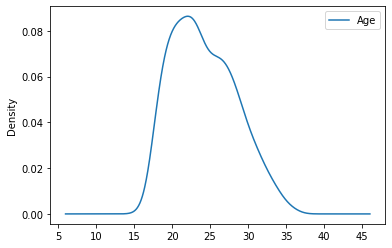

In [23]:
fifa_germany_age_pandas.plot(kind='density')
plt.show()


In [24]:
'''
=> độ tuổi của các cầu thủ phân bố chính từ 15 -> 35, đặc biệt trong khoảng từ 20-25
tất nhiên là phải trẻ, khỏe mới làm cầu thủ dc vì thường từ 35 tuổi trở đi, các cầu thủ có xu hướng giải nghệ hoặc trở thành huấn luyện viên.
'''

'\n=> độ tuổi của các cầu thủ phân bố chính từ 15 -> 35, đặc biệt trong khoảng từ 20-25\ntất nhiên là phải trẻ, khỏe mới làm cầu thủ dc vì thường từ 35 tuổi trở đi, các cầu thủ có xu hướng giải nghệ hoặc trở thành huấn luyện viên.\n'

### **6. Từ fifa_df, cho biết mỗi độ tuổi có bao nhiêu cầu thủ. Độ tuổi trung bình của cầu thủ mỗi quốc gia là bao nhiêu?**

In [27]:
fifa_df.groupBy("Age").count().show()

+---+-----+
|Age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 47|    1|
| 16|   13|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 43|    2|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
+---+-----+
only showing top 20 rows



In [28]:
fifa_df.groupBy("Nationality").avg("Age").show()

+--------------+------------------+
|   Nationality|          avg(Age)|
+--------------+------------------+
|          Chad|              25.0|
|        Russia| 25.23202614379085|
|      Paraguay| 26.10144927536232|
|       Senegal|25.046511627906977|
|        Sweden|25.119565217391305|
|        Guyana|              28.0|
|       Eritrea|              32.0|
|   Philippines|25.666666666666668|
|          Fiji|              29.0|
|        Turkey|25.127147766323024|
|          Iraq|              26.0|
|       Germany| 24.20263157894737|
|St Kitts Nevis|26.666666666666668|
|       Comoros| 27.11111111111111|
|   Afghanistan|              22.0|
|   Ivory Coast| 24.10891089108911|
|         Sudan|              22.5|
|        France|24.634969325153374|
|        Greece|24.418367346938776|
|        Kosovo|           23.9375|
+--------------+------------------+
only showing top 20 rows



### **7. Từ fifa_df, cho biết "Age" nhỏ nhất, "Age" lớn nhất, "Strength" nhỏ nhất, "Strength" lớn nhất**

In [30]:
fifa_df.groupBy("Nationality").agg(F.min("Age"), 
    F.max("Age"), 
    F.min("Strength"), 
    F.max("Strength")).show()


+--------------+--------+--------+-------------+-------------+
|   Nationality|min(Age)|max(Age)|min(Strength)|max(Strength)|
+--------------+--------+--------+-------------+-------------+
|          Chad|      24|      26|           73|           79|
|      Paraguay|      18|      37|           33|           91|
|        Russia|      17|      37|           26|           93|
|       Senegal|      18|      34|           37|           94|
|        Sweden|      17|      37|           21|           91|
|        Guyana|      25|      34|           47|           75|
|       Eritrea|      32|      32|           85|           85|
|   Philippines|      22|      28|           42|           76|
|          Fiji|      29|      29|           57|           57|
|        Turkey|      17|      39|           30|           90|
|          Iraq|      21|      30|           55|           86|
|       Germany|      16|      36|           28|           94|
|St Kitts Nevis|      23|      32|           32|       

### **8. Liệt kê danh sách các "Club" (duy nhất) theo 2 cách với Dataframe fifa_df và SQL query với fifa_table.**


In [31]:
fifa_df.select("Club").distinct().show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



In [32]:
query = '''SELECT DISTINCT Club FROM fifa_table'''
fifa_clubs = spark.sql(query)
fifa_clubs.show()


+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



### **9. Từ fifa_df, sắp xếp dữ liệu giảm dần theo Age => fifa_df_desc.**

In [35]:
fifa_df_desc = fifa_df.orderBy(fifa_df["Age"].desc())

In [36]:
fifa_df_desc.select("Name", "Age", "Strength").show(3)

+-------------+---+--------+
|         Name|Age|Strength|
+-------------+---+--------+
|B. Richardson| 47|      47|
| E. El Hadary| 44|      73|
|     O. Pérez| 44|      66|
+-------------+---+--------+
only showing top 3 rows



### **10. Có bao nhiêu cầu thủ trong "Name" có "Cristiano" theo 2 cách với Dataframe fifa_df và SQL query với fifa_table. In tên các cầu thủ này.**

In [37]:
people_with_Cristiano = fifa_df.where(fifa_df["Name"].contains("Cristiano"))
people_with_Cristiano.count()

3

In [38]:
people_with_Cristiano.select("Name").show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+



In [39]:
query = '''SELECT * FROM fifa_table WHERE Name like "%Cristiano%"'''
people_with_Cristiano_2 = spark.sql(query)
people_with_Cristiano_2.count()

3

In [40]:
people_with_Cristiano_2.select("Name").show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+

